# Customer segmentation Analysis

In this project we will explore a dataset of product sales in Brazil. The dataset has information about the geological location of sales, revenue distribution, customer distribution, delivery information, customer behavior and product popularity.

In [1]:
# importing all the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in the datasets.
geo = pd.read_csv('geolocation_olist_public_dataset.csv')
order = pd.read_csv('olist_public_dataset_v2.csv')
cust = pd.read_csv('olist_public_dataset_v2_customers.csv')
pay = pd.read_csv('olist_public_dataset_v2_payments.csv')
trans = pd.read_csv('product_category_name_translation.csv')

### Geological location data exploration.

Exploring the data with respect to geological location.

In [3]:
geo.head()

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820
2,10,sao paulo,sp,-23.540984,-46.642569
3,10,sao paulo,sp,-23.546758,-46.645771
4,10,sao paulo,sp,-23.546362,-46.643073


In [4]:
# dropping duplicates.
geo = geo.drop_duplicates(subset=None, keep='first', inplace=False)

**Grouping zip codes to same latitude and longitude by taking their mean.**

In [5]:
centroid = geo.groupby('zip_code_prefix').agg({
    'lat': 'median',
    'lng': 'median',
    'city': pd.Series.mode
}).reset_index()
centroid['count'] = geo.groupby('zip_code_prefix').size().reset_index(
    name='counts')['counts']
centroid.head()

,zip_code_prefix,lat,lng,city,count
0,10,-23.545520,-46.636225,sao paulo,323
1,11,-23.528066,-46.649218,sao paulo,316
2,12,-23.540822,-46.654373,sao paulo,419
3,13,-23.556829,-46.648644,sao paulo,348
4,14,-23.567885,-46.663207,sao paulo,414


Text(0.5, 1.0, 'Scatter Plot of Centroid Data')

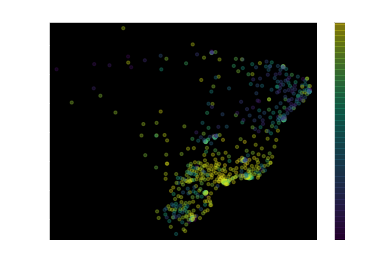

In [27]:
%matplotlib inline
# Distribution of markets in Brazil.
latitudes = centroid["lat"]
longitudes = centroid["lng"]
counts = centroid["count"]

# Create a scatter plot
plt.scatter(longitudes, latitudes, s=10, c=counts, alpha=0.3)

# Adjust the size range of points
plt.ylim(min(latitudes) - 1, max(latitudes) + 1)
plt.xlim(min(longitudes) - 1, max(longitudes) + 1)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label("Count")

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Centroid Data")

As we can see, the market is distributed highly in Southern Brazil approximately around lat: -22 and lng: -46.  If the company is interested in expanding the market it is **highly recommended to expand the market in north and west Brazil.**

### Revenue Distribution

We will join the order dataset and geological dataset before doing analysis.

In [16]:
order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [17]:
# dropping duplicatess.
order = order.drop_duplicates(subset=None, keep='first', inplace=False)

In [18]:
# merging the data.
geo_order = pd.merge(centroid,
                     order,
                     how='right',
                     left_on='zip_code_prefix',
                     right_on='customer_zip_code_prefix')

In [19]:
# grouping the orders by zip code:
geo_rev = geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'order_products_value':
    'sum'
}).reset_index()

Text(0.5, 1.0, 'Density Map of Geo_rev Data')

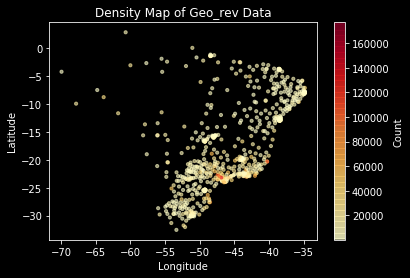

In [31]:
latitudes = geo_rev["lat"]
longitudes = geo_rev["lng"]
order_values = geo_rev["order_products_value"]

# Create a scatter plot with colormap representing density
plt.scatter(longitudes, latitudes, c=order_values, cmap="YlOrRd", s=10, alpha=0.6)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label("Count")

# Set map style
plt.style.use("dark_background")

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Density Map of Geo_rev Data")


As shown in the map above, we can conclude there are three main hotspots which are located in south-eastern Brazil. These three places are the market with the highest revenue. **To raise company's revenue, it is highly recommended to add more market around these three hotspots.** 

### Customer Distribution

In [32]:
# Grouping customers by zip code.
geo_order = geo_order.dropna(subset=['zip_code_prefix'])
geo_cust = geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'customer_id':
    'count'
}).reset_index()

Text(0.5, 1.0, 'Density Map of Geo_cust Data')

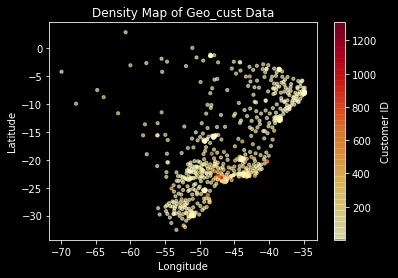

In [35]:
# geological distribution of customers.
latitudes = geo_cust["lat"]
longitudes = geo_cust["lng"]
customer_ids = geo_cust["customer_id"]

# Create a scatter plot with colormap representing density
plt.scatter(longitudes, latitudes, c=customer_ids, cmap="YlOrRd", s=10, alpha=0.6)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label("Customer ID")

# Set map style
#plt.style.use("seaborn-dark")

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Density Map of Geo_cust Data")


**Most of the customers are located in southeastern Brazil which leads to most sales in this region.**

With this geological approach, there are a few things I can recommend:

1. For branding expansion, it is best for the company to expand the market at the west and north Brazil. However, with low income from these location, it would be better to build only a few market for each city or area since the interest of the customer is currently low.
2. For increase in revenue, it is best for the company to expand the market at these three hotspots:
    lat:-23, lng:-46
    lat: -22, lng:-43
    lat: -19, lng:-43
    Since these hotspots have the highest number of customer and revenue, it shows that the customer around these hotspots interested with the market.

### Order date and time exploration

In [36]:
# converting relevant columns to datetime
geo_order['order_delivered_customer_date'] = pd.to_datetime(
    geo_order['order_delivered_customer_date'])
geo_order['order_estimated_delivery_date'] = pd.to_datetime(
    geo_order['order_estimated_delivery_date'])

In [37]:
# dropping the rows for which delivery date was empty as the order must have been cancelled.
geo_order = geo_order.dropna(subset=['order_delivered_customer_date'])

In [38]:
# calculating difference between delivery date and estimated delivery date.
# ideally this should be 0 or negative.
geo_order['range_time'] = (
    geo_order['order_delivered_customer_date'] -
    geo_order['order_estimated_delivery_date']).astype('timedelta64[D]')

In [39]:
# calculating if an order was delayed or if it arrived early.
delay = geo_order['range_time'][geo_order['range_time'] > 0]
early = abs(geo_order['range_time'][geo_order['range_time'] < 0])

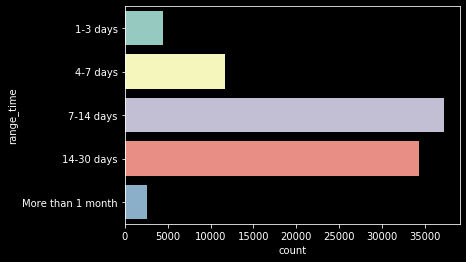

In [40]:
# binning and plotting the early distribution.
bins = [0, 3, 7, 14, 30, 90]
labels = [
    '1-3 days', '4-7 days', '7-14 days', '14-30 days', 'More than 1 month'
]
early = pd.cut(early, bins=bins, labels=labels)
sns.countplot(y=early)

Its good that the order are arriving usually early by 7-30 days, but **this shows a high level of inaccuracy in the delivery date estmation.**

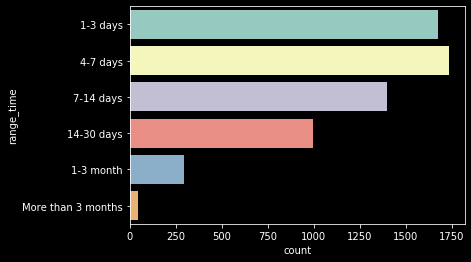

In [41]:
# binning and plotting the delay distribution.
bins = [0, 3, 7, 14, 30, 90, 300]
labels = [
    '1-3 days', '4-7 days', '7-14 days', '14-30 days', '1-3 month',
    'More than 3 months'
]
delay = pd.cut(delay, bins=bins, labels=labels)
sns.countplot(y=delay)

Most of the orders are delayed by 4-7 days. We can push these to 1-3 days to improve customer satisfaction.

In [42]:
# checking out which locations have delayed deliveries.
geo_order['range_time_default'] = geo_order['range_time'].apply(
    lambda x: 1 if x > 0 else 0)

In [43]:
# grouping by zipcode.
delay_place = geo_order.groupby('zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'range_time_default':
    'mean'
})

Text(0.5, 1.0, 'Density Map of Delay_place Data')

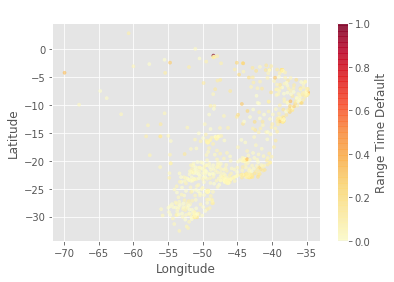

In [46]:
latitudes = delay_place["lat"]
longitudes = delay_place["lng"]
range_times = delay_place["range_time_default"]

# Create a scatter plot with colormap representing density
plt.scatter(longitudes, latitudes, c=range_times, cmap="YlOrRd", s=10, alpha=0.6)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label("Range Time Default")

# Set map style
plt.style.use("ggplot")

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Density Map of Delay_place Data")

In [47]:
# printing percentage of early, delayed and on-time deliveries. 
normal = geo_order['range_time'][geo_order['range_time'] == 0]
print('normal:',
      round(normal.count() * 100 / geo_order['range_time'].count(),
            3), '%', '\nearly:',
      round(early.count() * 100 / geo_order['range_time'].count(), 3), '%',
      '\ndelay:',
      round(delay.count() * 100 / geo_order['range_time'].count(), 3), '%')

normal: 1.259 % 
early: 92.44 % 
delay: 6.293 %


### Order timing analysis

We can look at the order timing and use to decide what time is the best for promotion as that will be the time when most customers are online looking at products.

In [48]:
# changing timestamp to datetime.
order['order_purchase_timestamp'] = pd.to_datetime(
    order['order_purchase_timestamp'])

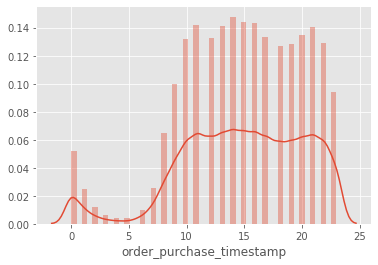

In [49]:
# plotting hourly distribution of orders.
best_time_hours = (order.order_purchase_timestamp).dt.hour
sns.distplot(best_time_hours)

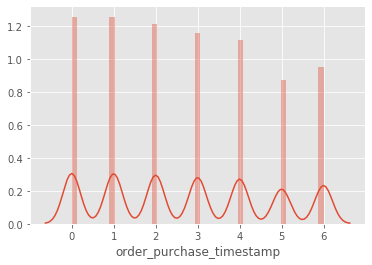

In [52]:
# plotting daily distribution of orders.
best_time_day = order.order_purchase_timestamp.apply(lambda x: x.weekday())
sns.distplot(best_time_day)

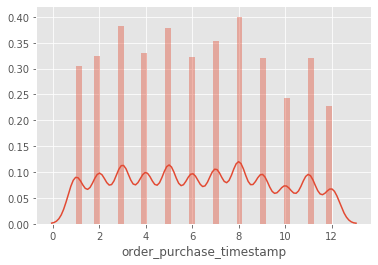

In [53]:
# plotting monthly distribution of orders.
best_time_month = (order.order_purchase_timestamp).dt.month
sns.distplot(best_time_month)

Based on these three plots we can say that:

1. In between midnight and 8 AM is not a good time for promotion.
2. Saturdays and Sundays are less preferable times for promotion.
3. October is a less preferable month for promotion.

### Customer Behavior exploration.

In this section we will explore customer behavior with respect to their ordering habits.

In [54]:
cust.head()

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff
2,00012a2ce6f8dcda20d059ce98491703,7e0e291c0f4fc2d69208954d26ed0586
3,000161a058600d5901f007fab4c27140,ff1dcb27ea444eddb94ea5fea77b875c
4,00017f1d6cce0d56046219a2cfabcbbb,237130c4b6717031ed62d9d0b16fd94f


In [55]:
# dropping duplicates.
cust = cust.drop_duplicates(subset=None, keep='first', inplace=False)

In [56]:
# merge with the order table on customer id.
order_cust = pd.merge(cust,
                      order,
                      how='right',
                      left_on='customer_id',
                      right_on='customer_id')

In [57]:
# calculate the days from most recent order to every order from customer.
order_cust = order_cust.dropna(subset=['order_aproved_at'])
order_cust['order_aproved_at'] = pd.to_datetime(order_cust['order_aproved_at'])
order_cust['latest'] = max(order_cust.order_aproved_at)
order_cust[
    'range_time'] = order_cust['latest'] - order_cust['order_aproved_at']
recent = order_cust.groupby('customer_unique_id').agg({
    'range_time': 'min'
}).astype('timedelta64[D]')
order_cust.head()

,customer_id,customer_unique_id,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,...,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,latest,range_time
0,297dcf281305aabfee256d313076af2b,a27e24da3a7dc34713304a30896a3c4e,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,...,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,2018-09-28 11:05:22.374345,604 days 08:24:00.824794
1,b7563d94162ed0aa3f8d9cada4bcc536,83c5f96adba9983897eb09729577aa6b,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,...,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00,2018-09-28 11:05:22.374345,382 days 15:01:50.839064
2,f102cb15ec41ca30fa2902da06495f6b,de5a83eec57b3ac456dca340651c030a,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,...,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00,2018-09-28 11:05:22.374345,605 days 17:33:56.936092
3,e33c250311160298e5b457ca52720a35,785b20b3b689b670e6b7e30f04eb6fdc,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,...,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00,2018-09-28 11:05:22.374345,200 days 16:34:44.442383
4,8a8f7c9a4450f17ba3ee25a5ba821bc7,539155c817eb96914de0b011b4d28d50,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,...,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00,2018-09-28 11:05:22.374345,521 days 02:59:41.968962


In [59]:
# getting frequency of orders and 
frequent = order_cust.groupby('customer_unique_id').agg(
    {'order_items_qty': 'sum'})
monetary = order_cust.groupby('customer_unique_id').agg(
    {'order_products_value': 'sum'})
frequent.head()
monetary.head()

,order_products_value
customer_unique_id,
000329c0b406d30f7e92fbd6a88a009e,18.90
0003418b36ed466545169cac383b59b4,58.90
000446ff827ee6397d0f00816d6a1fb2,105.00
0004983adf3647e6c0bf708af02e94e4,21.99
0004e8eb194ba10ce76319ad18b09a5c,70.00


In [65]:
# finding the earlist purchase time by each customer.
tenure = order_cust.groupby('customer_unique_id').agg({
    'range_time': 'max'
}).astype('timedelta64[D]')

In [66]:
# creating a dataframe of recency, frequency, monetary value and tenure of each customer.
rfmt = pd.concat([recent, frequent, monetary, tenure], axis=1)
rfmt.columns = ['recency', 'frequency', 'monetary', 'tenure']

In [67]:
rfmt.describe()

,recency,frequency,monetary,tenure
count,92499.000000,92499.000000,92499.000000,92499.00000
mean,307.114390,1.189094,139.651706,310.23637
std,157.680732,0.668378,212.647446,157.82497
min,0.000000,1.000000,2.000000,0.00000
25%,188.000000,1.000000,49.000000,191.00000
50%,305.000000,1.000000,89.900000,307.00000
75%,428.000000,1.000000,155.420000,432.00000
max,742.000000,25.000000,14776.000000,742.00000


In [69]:
# assigning rank to each customer. 1 will be lowest and 5 will be highest.
label1 = [5, 4, 3, 2, 1]
label2 = [1, 2, 3, 4, 5]
rfmt['R'] = pd.qcut(rfmt['recency'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label1)
rfmt['F'] = pd.cut(rfmt['frequency'], bins=[0, 1, 2, 3, 5, 900], labels=label2)
rfmt['M'] = pd.qcut(rfmt['monetary'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)
rfmt['T'] = pd.qcut(rfmt['tenure'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)

In [70]:
rfmt = rfmt.reset_index()

In [72]:
# if recency is lowest, frequency is highest and monetary value is highest they are the best customers.
best = rfmt[rfmt.R.isin([4, 5]) & rfmt.F.isin([4, 5]) & rfmt.M.isin([4, 5])]
best['segment'] = 'BEST'

# loyal spenders.
loyal_spender = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([2, 3])
                     & rfmt['M'].isin([2, 3]) & rfmt['T'].isin([3, 4, 5])]
loyal_spender['segment'] = 'LOYAL SPENDER'

# potential loyal customers.
potential_loyal = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([2, 3])
                       & rfmt['M'].isin([2, 3]) & rfmt['T'].isin([1, 2])]
potential_loyal['segment'] = 'POTENTIAL LOYAL'

#loyal customer.
loyal_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                  & rfmt['M'].isin([1]) & rfmt['T'].isin([3, 5])]
loyal_cust['segment'] = 'LOYAL CUSTOMER'

# new customer.
new_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                & rfmt['M'].isin([1]) & rfmt['T'].isin([1, 2])]
new_cust['segment'] = 'NEW CUSTOMER'

# promising customer.
promising = rfmt[rfmt['R'].isin([2, 3]) & rfmt['F'].isin([3, 5])
                 & rfmt['M'].isin([3, 5])]
promising['segment'] = 'PROMISING'

# can not lose customers.
cant_lose = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                 & rfmt['M'].isin([4, 5])]
cant_lose['segment'] = 'CAN NOT LOSE'

# about to sleep customers.
about_to_sleep = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                      & rfmt['M'].isin([4, 5])]
about_to_sleep['segment'] = 'ABOUT TO SLEEP'

# Hibernating Customers.
hibernating = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([2, 3])
                   & rfmt['M'].isin([2, 3])]
hibernating['segment'] = 'HIBERNATING'

lost = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([1]) & rfmt['M'].isin([1])
            & rfmt['T'].isin([1])]
lost['segment'] = 'HIBERNATING'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [74]:
# adding these categories to our customer order table.
rfmt_segment = pd.concat([
    best, loyal_spender, potential_loyal, new_cust, loyal_cust, promising,
    cant_lose, about_to_sleep, hibernating, lost
])

In [75]:
rfmt_segment.sample(10)

,customer_unique_id,recency,frequency,monetary,tenure,R,F,M,T,segment
84228,e8d35eb9f949d6bf2c28b44e6426553b,210.0,1,19.99,210.0,4,1,1,2,NEW CUSTOMER
43759,78ecda593f1b0325327910e1ae0721a8,198.0,1,39.90,198.0,4,1,1,2,NEW CUSTOMER
5899,10501fc846aa261a22596c9ced19febe,84.0,1,37.90,84.0,5,1,1,1,NEW CUSTOMER
66325,b7794b7a79a93872e3a2bfe7175da74c,151.0,2,107.80,151.0,5,2,3,1,POTENTIAL LOYAL
64742,b32d62060cfbd176e22d63f23768ea23,130.0,2,78.00,130.0,5,2,3,1,POTENTIAL LOYAL
46227,7f93e58deb6f6a4d2d938e4c863713d3,115.0,1,18.90,115.0,5,1,1,1,NEW CUSTOMER
25662,46d7aee47c1c50a8caff465721eabba8,28.0,1,22.99,28.0,5,1,1,1,NEW CUSTOMER
76545,d3e57a516b9d9130b26112a90d07617f,217.0,1,13.69,217.0,4,1,1,2,NEW CUSTOMER
67400,ba6aead49a8406cca43e43d386c74553,68.0,1,19.90,68.0,5,1,1,1,NEW CUSTOMER
28331,4e404d7e91e98cd0acd36b12489ce7ed,168.0,1,24.95,168.0,4,1,1,2,NEW CUSTOMER


We have thus categorized customers. **We can give points for purchased products to the best customers. Furthermore, we can promote things that interest new customers from their previous purchase.**

### Popularity Analysis.

Looking at the popularity of products.

In [76]:
trans.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [77]:
# merging order data with product data.
order_trans = pd.merge(trans,
                       order,
                       how='right',
                       on=['product_category_name', 'product_category_name'])
order_en = order_trans.drop(['product_category_name'], axis=1)

In [78]:
order_en.head()

,product_category_name_english,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,health_beauty,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,computers_accessories,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,auto,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,bed_bath_table,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,furniture_decor,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


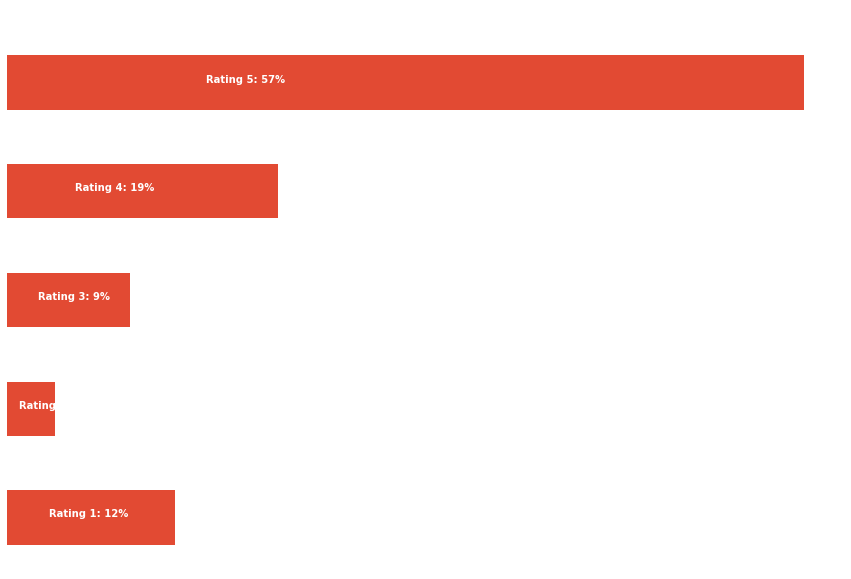

In [79]:
# plot percentage of respective ratings.
n = order_en.groupby('review_score')['review_score'].agg(['count'])

prod_count = order_en['product_id'].nunique()

cust_count = cust['customer_unique_id'].nunique() - prod_count

rating_count = order_en['review_score'].count() - cust_count

ax = n.plot(kind='barh', legend=False, figsize=(15, 10))
plt.title(
    'Total pool: {:,} Products, {:,} Customers, {:,} Ratings given'.format(
        prod_count, cust_count, rating_count),
    fontsize=20)
plt.axis('off')

for i in range(1, 6):
    ax.text(n.iloc[i - 1][0] / 4,
            i - 1,
            'Rating {}: {:.0f}%'.format(i,
                                        n.iloc[i - 1][0] * 100 / n.sum()[0]),
            color='white',
            weight='bold')

**12% of ratings are 1 star**. This is not good news. The company should work on fixing this.

In [81]:
# listing the the most popular products.
pop_prod = pd.DataFrame(
    order_en.groupby('product_category_name_english')['review_score'].count())
most_popular = pop_prod.sort_values('review_score', ascending=False)
most_popular.head(10)

,review_score
product_category_name_english,
bed_bath_table,10435
health_beauty,7939
sports_leisure,7832
furniture_decor,7728
watches_gifts,7130
computers_accessories,6329
housewares,6230
garden_tools,4570
cool_stuff,4315


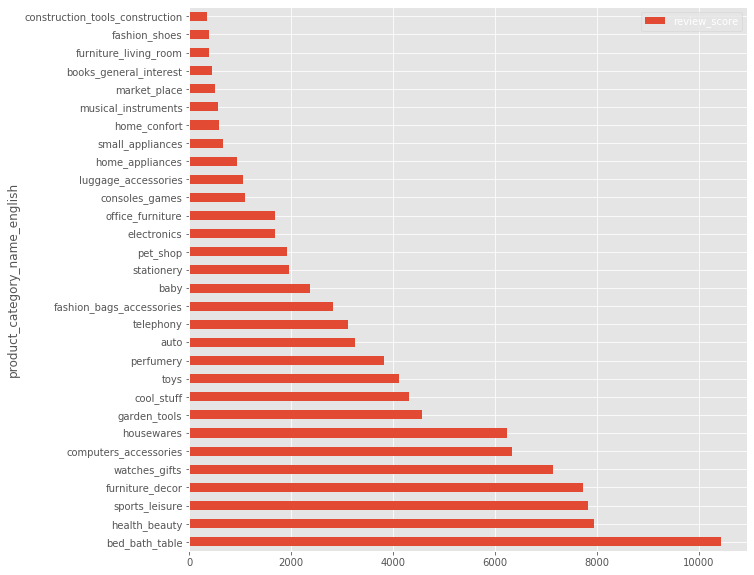

In [82]:
plt.rcParams['figure.figsize'] = (10, 10)
most_popular.head(30).plot(kind="barh")

Special thanks to Gita Kartika Suriah for the dataset and guiding code on GitHub. 

In [ ]:
pop_prod = pd.DataFrame(
    order_en.groupby('product_id')['review_score'].count())
most_popular = pop_prod.sort_values('review_score', ascending=False)
most_popular.head(10)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
most_popular.head(30).plot(kind="barh")